# Tasks

These are my solutions to the Tasks assessment. The author is Adam S. (G00387867@gmit.ie).

---

### Task 1: Calculating a square root
We can calculate the square root of a number by using  Newton's method [1, 2].
To find the square root $z$ of a number $x$, we can iterate using the following equation.
$$ z_{next} = z - \frac{z^2 - x}{2z} $$


[1] A Tour of Go; Excersize: Loops and Functions; https://tour.golang.org/flowcontrol/8 

[2] Newton's method; https://en.wikipedia.org/wiki/Newton%27s_method

[3] 1.14.3. String Formats for Float Precision; http://anh.cs.luc.edu/python/hands-on/3.1/handsonHtml/float.html


In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)
# Nicer colours and styles for plots.
plt.style.use("fivethirtyeight")

Text(0.5, 1.0, 'square root of a number')

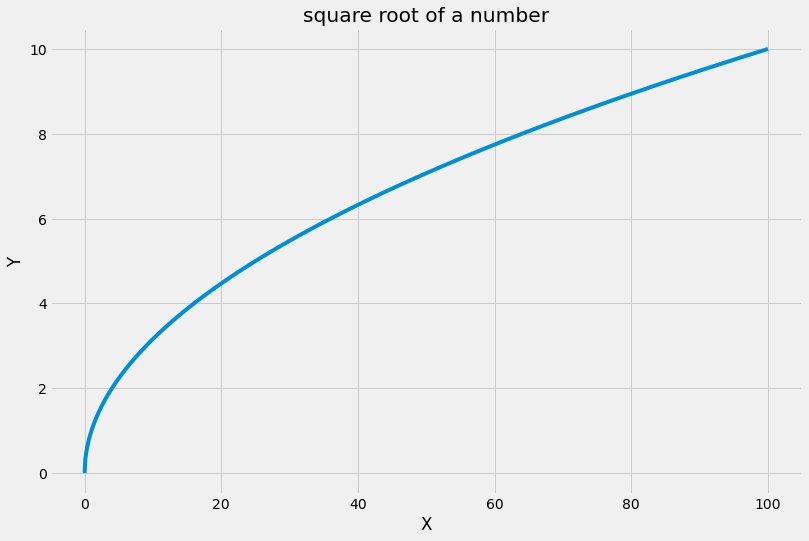

In [2]:
x = np.linspace(0.0, 100.0, 1000)
y = np.sqrt(x)
plt.plot(x,y)
# setting x-axis
plt.xlabel("X")
# setting y-axis
plt.ylabel("Y")
plt.title("square root of a number")

In [3]:


def sqrt(x):
    """"
    A function to calculate the square root of a number x.
    """
    # Initial guess for the square root z
    z = x 
    
    # precision, we want the precision to be to 100
    precision = 10**(-10)

    # Loop until we're happy with the accuracy.
    while abs(2 - (z * z)) > precision:
        # Calculate a better guess for the square root.
        z = (z + x / z) / 2
    # Return the (approximate) square root of x.
    return z


**Tests of the function**

In [4]:
sqrt(2)

1.4142135623746899

In [5]:
# increasing the precision of the floating point by using string formats [3]
format(sqrt(2), ".100f")

'1.4142135623746898698271934335934929549694061279296875000000000000000000000000000000000000000000000000'

***

### Task 2: The Chi-Square Test of Independence.

Definition:

The Chi-Square Test of Independence determines whether there is an association between categorical variables (i.e., whether the variables are independent or related). It is a nonparametric test.

This test utilizes a contingency table to analyze the data. A contingency table (also known as a cross-tabulation, crosstab, or two-way table) is an arrangement in which data is classified according to two categorical variables. The categories for one variable appear in the rows, and the categories for the other variable appear in columns. Each variable must have two or more categories. Each cell reflects the total count of cases for a specific pair of categories. [3]



[1] towards data science: https://towardsdatascience.com/gentle-introduction-to-chi-square-test-for-independence-7182a7414a95

[2] Wikipedia; Chi-squared test: https://en.wikipedia.org/wiki/Chi-squared_test

[3] Kent State University: https://libguides.library.kent.edu/spss/chisquare#:~:text=The%20Chi%2DSquare%20Test%20of%20Independence%20determines%20whether%20there%20is,Chi%2DSquare%20Test%20of%20Association.

In [6]:
# importing necessary libraries.
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd

In [7]:
# generating the data frame.
df = pd.DataFrame([
    
    [90, 60, 104, 95], [30, 50, 51, 20], [30, 40, 45, 35]
], 
    index = ["white collar", "blue collar", "no collar"],
    columns = ["A", "B", "C", "D"])
df


,A,B,C,D
white collar,90,60,104,95
blue collar,30,50,51,20
no collar,30,40,45,35


In [8]:
# columns in the data frame
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [9]:
# rows in the data frame
df.index

Index(['white collar', 'blue collar', 'no collar'], dtype='object')

In [10]:
chi2_contingency(df)

(24.5712028585826,
 0.0004098425861096696,
 6,
 array([[ 80.53846154,  80.53846154, 107.38461538,  80.53846154],
        [ 34.84615385,  34.84615385,  46.46153846,  34.84615385],
        [ 34.61538462,  34.61538462,  46.15384615,  34.61538462]]))

In [11]:
# Chisquare value
chisquare = chi2_contingency(df)[0]
chisquare

24.5712028585826

In [12]:
# p-value
pvalue = chi2_contingency(df)[1]
pvalue

0.0004098425861096696

In [13]:
# Degree of freedom
dof = chi2_contingency(df)[2]
dof

6

---

### Task 3: Standard Deviation

__Definitions__:

In `EXCEL`;

**`STDEV.P`**: is a function used when data represents the entire population. In `STDEV.P` function, the squared deviation is divided by the total number of arguments, mostly represented as N.

- The `STDEV.P` function considers entire data, and some factors may dominate the result standard deviation. And since it will be taken as the standard deviation for everyone in data, even for minorities, this is called **Biased Analysis**. This is why this standard deviation is recommended to use only when an analysis is non-destructive.
- The `STDEV.P` is just a newer version of STDEVP and STDEV functions of excel. There is no significant difference between them.
- The `STDEV.P` function only recognises numbers. Any other value is ignored.

The equivalent calculation for the **`STDEV.P`** using **`NumPy`** is : __np.sqrt(np.sum((x - np.mean(x))**2)/len(x))__.

**`STDEV.S`**: is a function used when  data is a sample of the entire population. In `STDEV.S` or `STDEV`, the squared deviation is divided by the total number of sample -1. It is represented as N-1.

- The `STDEV.S` or `STDEV` function is used on a small sample of the entire population, and we subtract one from the denominator (number of samples arguments). This is called non-biassed analysis of standard deviation. This is used when an analysis is destructive. [1]

The equivalent calculation for the `STDEV.S` using `NumPy` is : __np.sqrt(np.sum((x - np.mean(x))**2)/(len(x)-1))__.

[1] EXCELTIP; https://www.exceltip.com/statistical-formulas/how-to-use-excel-stdev-p-function.html#:~:text=Let's%20Explore.-,The%20STDEV.,sample%20of%20the%20entire%20population.

[2] Wikipedia ; Standard Deviation : https://en.wikipedia.org/wiki/Standard_deviation

[3] NumPy; numpy.std : https://numpy.org/doc/stable/reference/generated/numpy.std.html

[4] seaborn: statistical data visualization; https://seaborn.pydata.org/


In [14]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)
# Nicer colours and styles for plots.
plt.style.use("fivethirtyeight")

url = "https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv"
df = pd.read_csv(url, error_bad_lines=False)


In [15]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
speed,0.0,0.125,0.15,0.225,0.275,0.325,0.400,0.450,0.501,0.526,...,24.499,24.525,24.575,24.65,24.75,24.775,24.85,24.875,24.95,25.0
power,0.0,0.000,0.00,0.000,0.000,4.331,5.186,3.826,1.048,5.553,...,0.000,0.000,0.000,0.00,0.00,0.000,0.00,0.000,0.00,0.0


In [16]:
# we can notice that in the below functions that ddof (delta degrees of freedom) with ddof = 1 as a standard is applied
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [17]:
# Considering the data resembling the whole population ; np.sqrt(np.sum((x - np.mean(x))**2)/len(x)).
STDVP = np.std(df)
STDVP

speed     7.217763
power    41.572937
dtype: float64

In [18]:
# Considering the data resembling a SAMPLE of the whole population np.sqrt(np.sum((x - np.mean(x))**2)/(len(x)-1)).
STDVS = np.std(df, ddof = 1)
STDVS

speed     7.224991
power    41.614572
dtype: float64

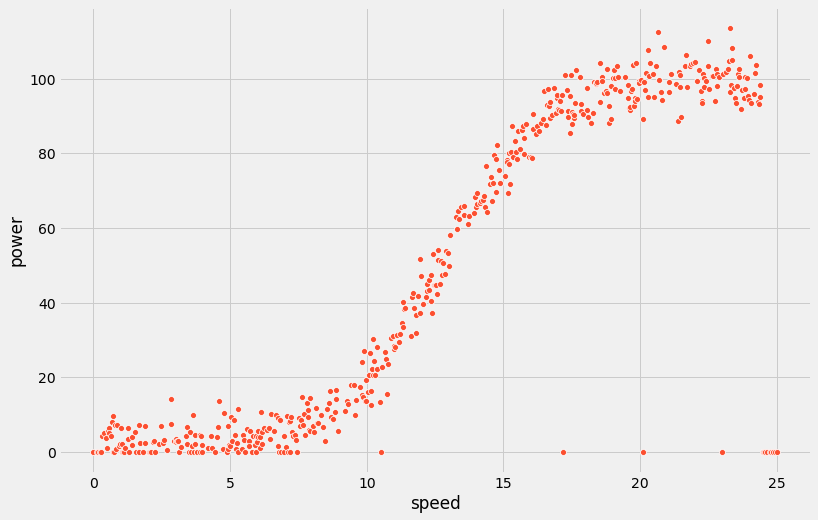

In [19]:
sns.scatterplot(x="speed", y="power", data=df, ci = STDVS)
# Scatter plotting.
sns.scatterplot(x="speed", y="power", data=df, ci = STDVS)

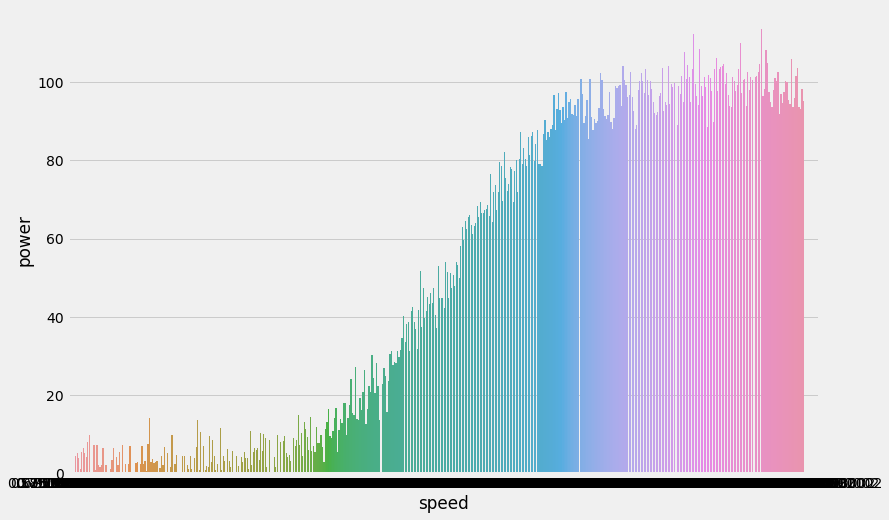

In [20]:
ax = sns.barplot(x="speed", y="power", data=df, ci="sd")
ax